In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('olympics_dataset.csv')
region_df=pd.read_csv('noc_regions.csv')

In [3]:
df.tail()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze
252564,1924402,Charlie Carvell,M,Great Britain,GBR,2024,Summer,Paris,Athletics,Men's 4 x 400m Relay,Bronze


In [4]:
df.shape

(252565, 11)

In [5]:
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [6]:
df=df.merge(region_df,on='NOC',how ='left')

In [7]:
df.tail()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,region,notes
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal,Equatorial Guinea,NaN
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal,Italy,NaN
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold,Netherlands,NaN
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze,France,NaN
252564,1924402,Charlie Carvell,M,Great Britain,GBR,2024,Summer,Paris,Athletics,Men's 4 x 400m Relay,Bronze,UK,NaN


In [8]:
df['region'].unique() #no of countries participated

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [9]:
df.isnull().sum()

player_id         0
Name              0
Sex               0
Team              0
NOC               0
Year              0
Season            0
City              0
Sport             0
Event             0
Medal             0
region         1139
notes        247951
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['Medal'].value_counts()

Medal
No medal    213747
Bronze       13070
Gold         13002
Silver       12746
Name: count, dtype: int64

In [12]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [13]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze','No medal']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze,No medal
0,USA,2716,1539,1366,11153
1,URS,832,635,596,2559
2,GBR,716,813,753,9716
3,GER,634,613,721,6898
4,FRA,583,712,660,10017
...,...,...,...,...,...
229,LBR,0,0,0,88
230,LES,0,0,0,71
231,LIB,0,2,2,234
232,LIE,0,0,0,103


In [14]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Year','City','Event','Medal'])

In [15]:
medal_tally=medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [16]:
medal_tally['total']=medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [17]:
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1107,885,780,2772
1,Russia,592,498,487,1577
2,Germany,465,478,515,1458
3,UK,313,360,350,1023
4,China,306,221,201,728
...,...,...,...,...,...
200,Kiribati,0,0,0,0
201,Iraq,0,0,1,1
202,Iceland,0,2,2,4
203,Honduras,0,0,0,0


In [18]:
Years=df['Year'].unique().tolist()

In [19]:
Years.sort()
Years.insert(0,'Overall')
Years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016,
 2020,
 2024]

In [20]:
country=np.unique(df['region'].dropna().values).tolist()

In [21]:
country.sort()
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [22]:
country.insert(0,'Overall')

In [23]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [24]:
def fetch_medal_tally(df,year,country):
    medal_df=df.drop_duplicates(subset=['Team','NOC','Year','City','Event','Medal'])
    flag=0
    if year=='Overall' and country=='Overall':
        temp_df = medal_df
    if year=='Overall' and country!='Overall':
        flag=1
        temp_df=medal_df[medal_df['region'] == country]
    if year!='Overall' and country=='Overall':
        temp_df=medal_df[medal_df['Year']== int(year)]
    if year!='Overall' and country!='Overall':
        temp_df=medal_df[(medal_df['Year'] == int(year)) & (medal_df['region']== country)]
    if flag==1:
        x=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['total']=x['Gold'] + x['Silver'] + x['Bronze']
    print(x)

# Overall Analysis

  

In [25]:
df.head(2)

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,No medal,Silver
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,China,NaN,False,False,True,False
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,China,NaN,False,False,True,False


In [26]:
df['Year'].unique().shape[0]-1

30

In [27]:
df['City'].unique().shape

(23,)

In [28]:
df['Sport'].unique().shape

(76,)

In [29]:
df['Event'].unique().shape

(1041,)

In [30]:
df['Name'].unique().shape

(129992,)

In [31]:
df['region'].unique().shape

(206,)

In [32]:
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,No medal,Silver
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,China,NaN,False,False,True,False
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,China,NaN,False,False,True,False
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal,Denmark,NaN,False,False,True,False
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False,False
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,Netherlands,NaN,False,False,True,False


In [33]:
nations_over_time=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [34]:
nations_over_time.rename(columns={'Year':'Edition','count':'No of Countries'},inplace=True)

In [35]:
import plotly.express as px

In [36]:
fig=px.line(nations_over_time,x="Edition",y="No of Countries")
fig.show()

In [37]:
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')

,Year,count
30,1896,43
28,1900,90
27,1904,95
29,1906,74
25,1908,109
26,1912,107
16,1920,158
23,1924,131
24,1928,122
22,1932,131


In [38]:
df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index().sort_values('Year')

,Year,count
30,1896,176
27,1900,1215
29,1904,642
28,1906,838
25,1908,2008
24,1912,2386
23,1920,2660
21,1924,3244
22,1928,3238
26,1932,1907


In [39]:
x=df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

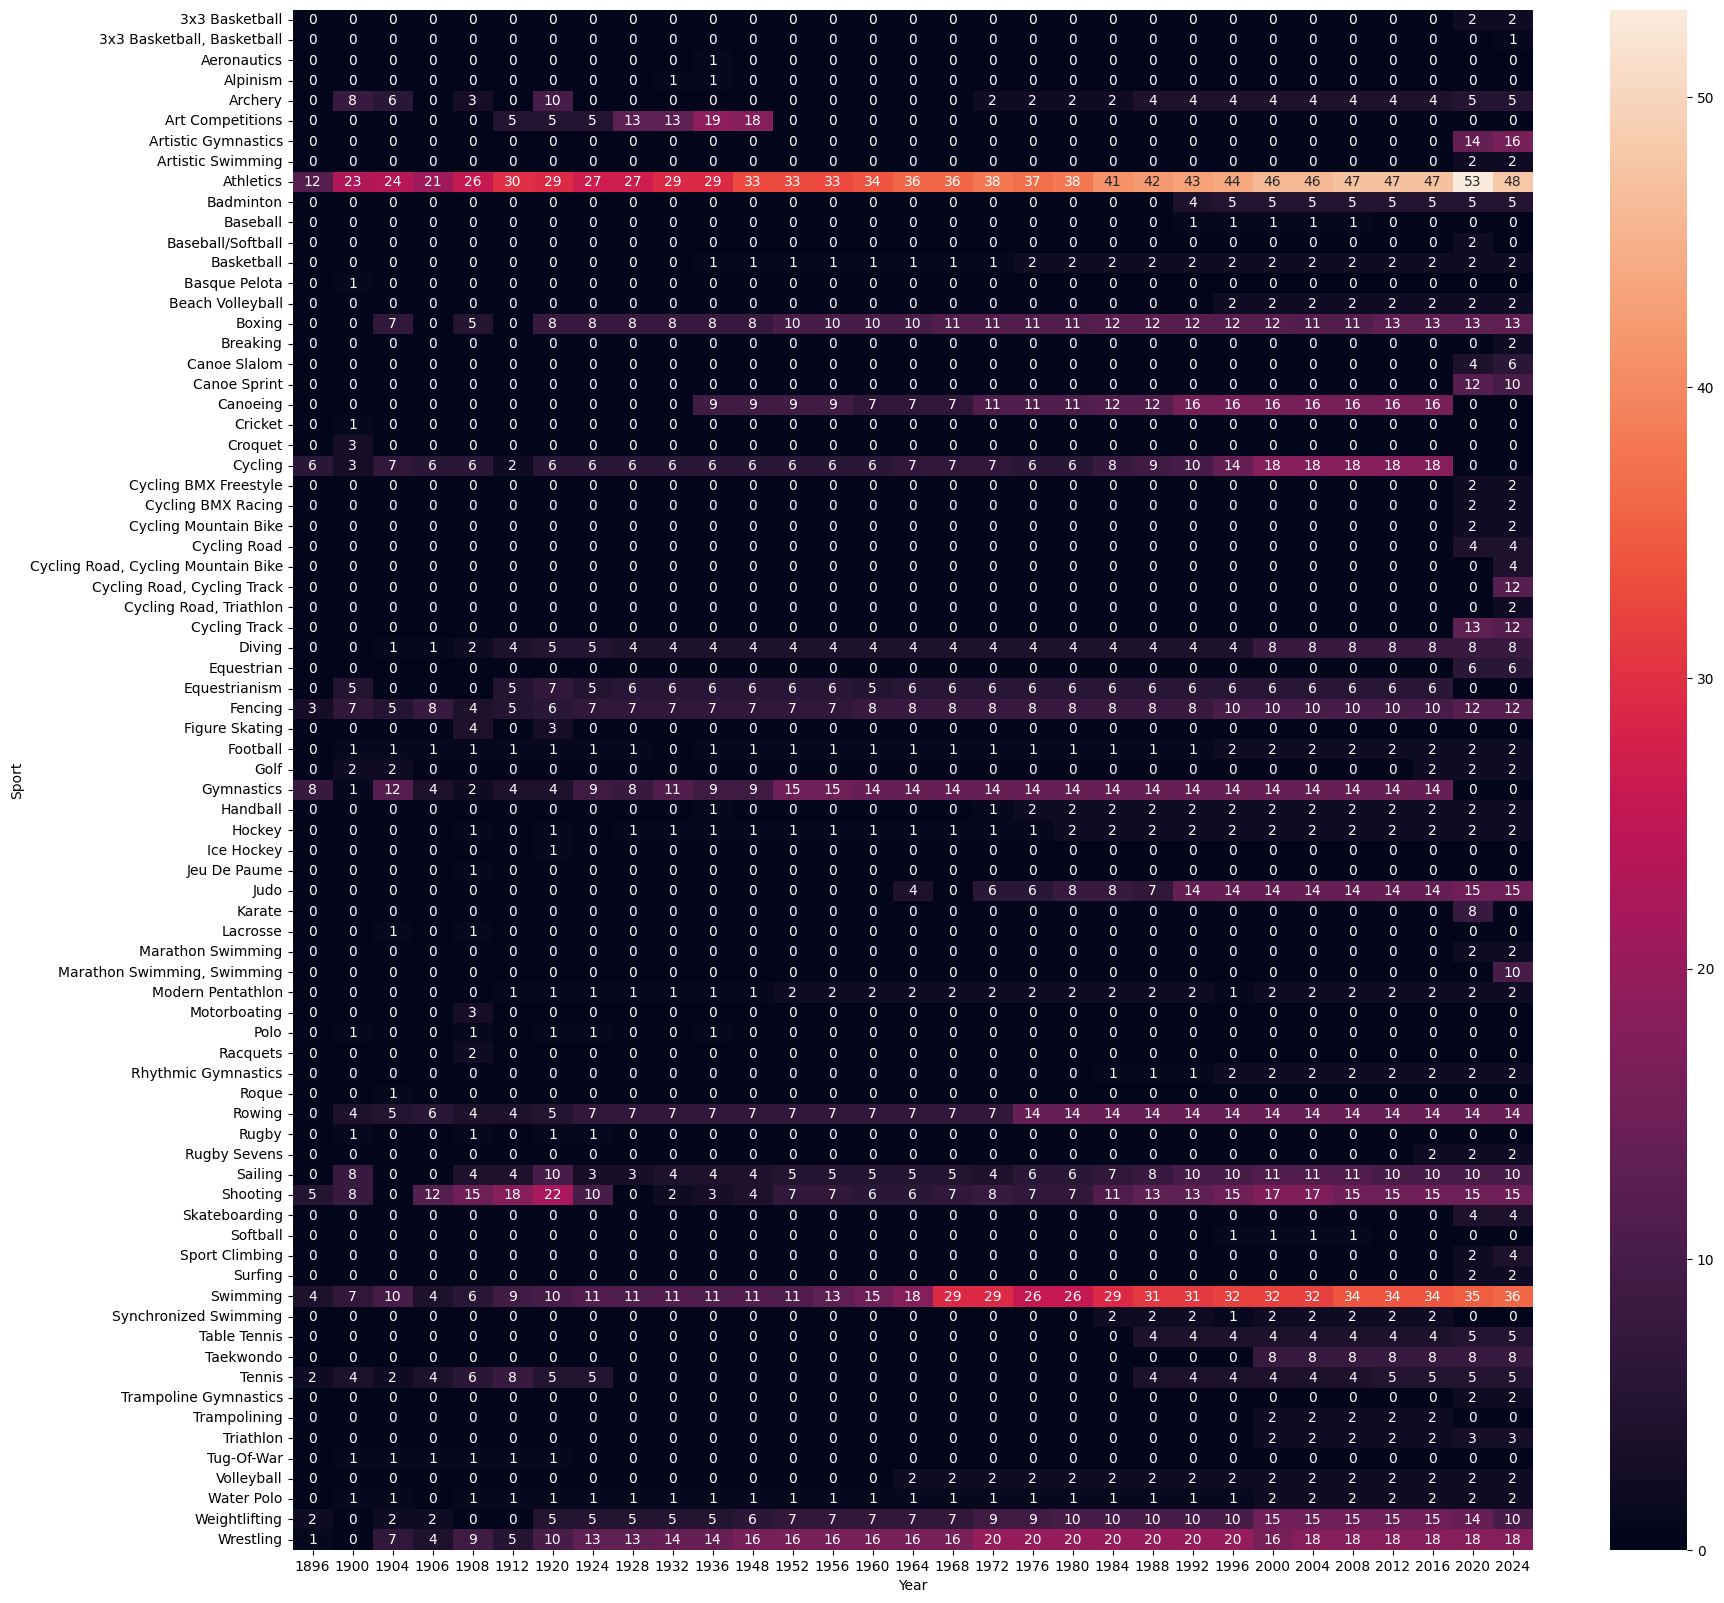

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0),annot=True)

In [41]:
df.head(2)

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,No medal,Silver
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,China,NaN,False,False,True,False
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,China,NaN,False,False,True,False


In [42]:
def most_successful(df, sport):
    # Filter out rows where the 'Medal' column has 'No medal'
    temp_df = df[df['Medal'] != 'No medal']

    # If a specific sport is selected, filter by that sport
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    # Get the top 15 most frequent 'Name' values and merge with original dataframe
    x = temp_df['Name'].value_counts().reset_index().merge(df, left_on='Name', right_on='Name', how='left')[
        ['Name', 'count', 'Sport', 'region']].drop_duplicates('Name')

    # Rename columns for clarity
    x.rename(columns={'count':'Medals'},inplace=True)
    
    return x


In [43]:
most_successful(df,'Overall')

,Name,Medals,Sport,region
0,Michael Ii,28,Swimming,USA
30,Larysa (diriy-),18,Gymnastics,Russia
49,Charles Jr.,16,Athletics,USA
80,Nikolay Andrianov,15,Gymnastics,Russia
104,Gustaf Carlberg,13,Shooting,Sweden
...,...,...,...,...
73731,Kim Seong-mun,1,Wrestling,South Korea
73735,Kim Seon-yeong,1,Judo,South Korea
73736,Kim Sang-gyu,1,Wrestling,South Korea
73738,Kim Rang,1,Handball,South Korea


# Country Wise Analysis

In [44]:
df

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,No medal,Silver
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,China,NaN,False,False,True,False
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,China,NaN,False,False,True,False
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal,Denmark,NaN,False,False,True,False
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False,False
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,Netherlands,NaN,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal,Equatorial Guinea,NaN,False,False,True,False
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal,Italy,NaN,False,False,True,False
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold,Netherlands,NaN,False,True,False,False
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze,France,NaN,True,False,False,False


In [45]:
temp_df= df[df['Medal'] != 'No medal']
temp_df.drop_duplicates(subset=['Team','NOC','Year','City','Event','Medal'],inplace=True)

C:\Users\rajab\AppData\Local\Temp\ipykernel_22240\583319949.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
new_df=temp_df[temp_df['region'] == 'India']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()

In [47]:
fig=px.line(final_df,x="Year",y="Medal")
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

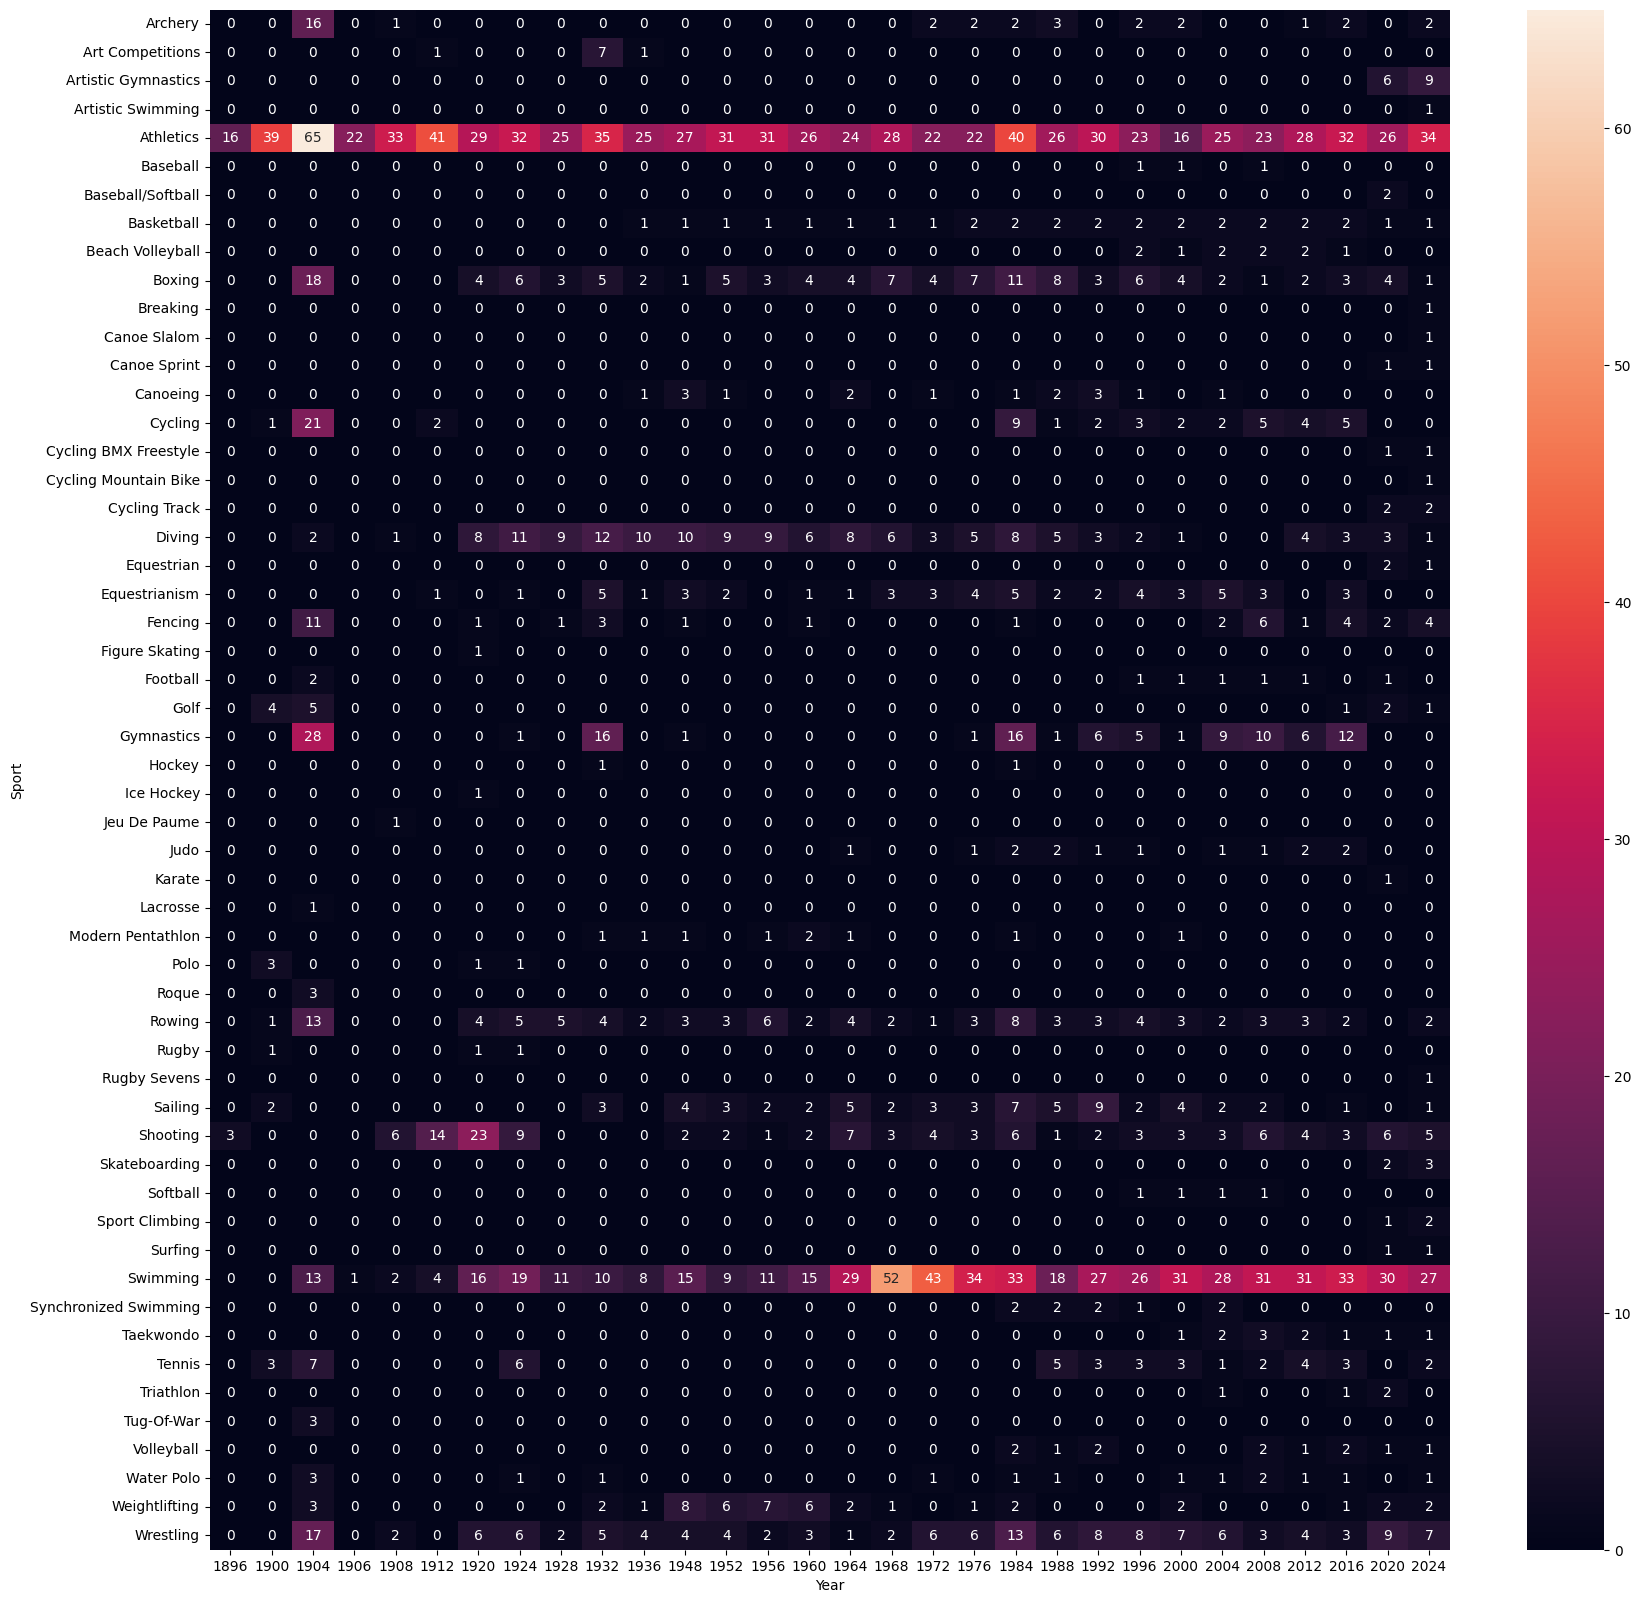

In [48]:
new_df=temp_df[temp_df['region'] == 'USA']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [49]:
def most_successful(df,country):
    temp_df = df[df['Medal'] != 'No medal']


    temp_df = temp_df[temp_df['region'] == country]

    x = temp_df['Name'].value_counts().reset_index().head(30).merge(df, left_on='Name', right_on='Name', how='left')[
        ['Name', 'count', 'Sport']].drop_duplicates('Name')

    x.rename(columns={'count':'Medals'},inplace=True)
    
    return x

In [50]:
most_successful(df,'USA')

,Name,Medals,Sport
0,Michael Ii,28,Swimming
30,Charles Jr.,16,Athletics
61,Jennifer (-cumpelik),12,Swimming
78,Ryan Lochte,12,Swimming
92,Dara -minas),12,Swimming
105,Natalie (-hall),12,Swimming
117,Carl Osburn,11,Shooting
133,John Jr.,11,Shooting
209,Simone Biles,11,Gymnastics
228,Matthew Biondi,11,Swimming


# Athelete-Wise Analysis

In [51]:
import plotly.figure_factory as ff

In [52]:
athlete_df=df.drop_duplicates(subset=['Name','region'])

In [53]:
men=athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women=athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [54]:
final=men.merge(women,on='Year',how='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)


In [55]:
final.fillna(0)

,Year,Male,Female
0,1896,171,0.0
1,1900,1170,23.0
2,1904,613,6.0
3,1906,752,6.0
4,1908,1731,44.0
5,1912,1924,53.0
6,1920,2237,73.0
7,1924,2493,132.0
8,1928,2308,285.0
9,1932,1333,162.0


In [56]:
fig=px.line(final,x="Year",y=["Male","Female"])
plt.figure(figsize=(15,15))
fig.show()

<Figure size 1500x1500 with 0 Axes>

In [62]:
df.head(2)

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,No medal,Silver
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,China,NaN,False,False,True,False
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,China,NaN,False,False,True,False


In [69]:
overall_athletes_by_country = df.groupby('NOC')['Name'].nunique().sort_values(ascending=False)
print("Top 10 countries by total athletes sent:")
print(overall_athletes_by_country.head(10))

Top 10 countries by total athletes sent:
NOC
USA    8535
FRA    6046
GBR    6040
GER    4565
ITA    4480
AUS    4195
CAN    3997
JPN    3986
NED    3093
ESP    2993
Name: Name, dtype: int64


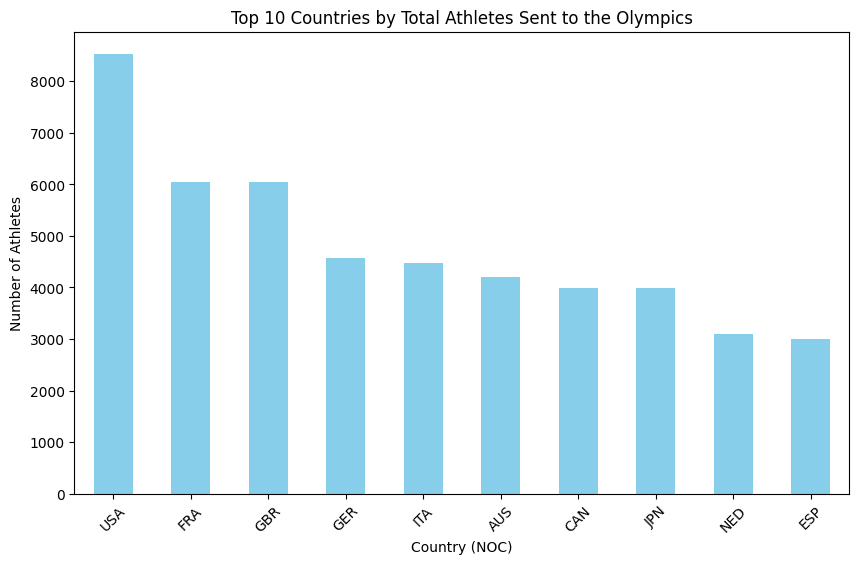

In [73]:
plt.figure(figsize=(10, 6))
overall_athletes_by_country.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Athletes Sent to the Olympics')
plt.xlabel('Country (NOC)')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.show()

In [74]:
yearwise_athletes_by_country = df.groupby(['Year', 'NOC'])['Name'].nunique().unstack().fillna(0)
top_countries = overall_athletes_by_country.head(5).index
yearwise_top_countries = yearwise_athletes_by_country[top_countries]
print("Yearwise number of athletes sent by top countries:")
print(yearwise_top_countries)

Yearwise number of athletes sent by top countries:
NOC     USA    FRA    GBR    GER    ITA
Year                                   
1896   14.0   12.0   10.0   19.0    1.0
1900   75.0  715.0  104.0   76.0   23.0
1904  518.0    1.0    6.0   22.0    1.0
1906   38.0   56.0   48.0   49.0   76.0
1908  119.0  208.0  732.0   82.0   66.0
1912  172.0  119.0  273.0  185.0   66.0
1920  285.0  304.0  234.0    0.0  173.0
1924  297.0  401.0  267.0    0.0  199.0
1928  277.0  255.0  231.0  293.0  174.0
1932  463.0  103.0  107.0  145.0  112.0
1936  352.0  201.0  208.0  433.0  244.0
1948  289.0  316.0  406.0    0.0  215.0
1952  279.0  245.0  256.0  205.0  231.0
1956  300.0  145.0  197.0  167.0  135.0
1960  289.0  238.0  253.0  293.0  280.0
1964  344.0  138.0  204.0  337.0  167.0
1968  355.0  200.0  225.0    0.0  167.0
1972  397.0  227.0  284.0    0.0  223.0
1976  391.0  206.0  242.0    0.0  209.0
1980    0.0  121.0  219.0    0.0  159.0
1984  519.0  238.0  337.0    0.0  268.0
1988  526.0  266.0  345.0    

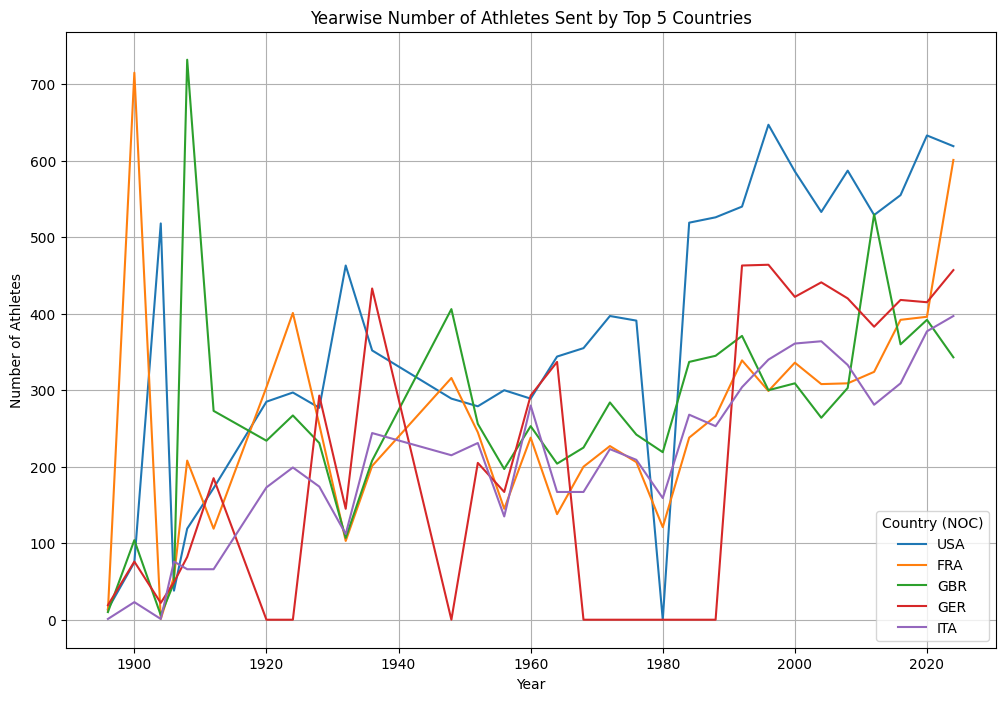

In [75]:
plt.figure(figsize=(12, 8))
for country in top_countries:
    plt.plot(yearwise_top_countries.index, yearwise_top_countries[country], label=country)

plt.title('Yearwise Number of Athletes Sent by Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(title='Country (NOC)')
plt.grid(True)
plt.show()